In [1]:
!pip install plotly --upgrade
!pip install networkx --upgrade

     |████████████████████████████████| 7.2MB 9.6MB/s 
  Found existing installation: plotly 4.1.1
    Uninstalling plotly-4.1.1:
      Successfully uninstalled plotly-4.1.1
Requirement already up-to-date: networkx in /usr/local/lib/python3.6/dist-packages (2.4)


Nodes of graph: ['0', '1', '2', '3', '4']
Edges of graph: [('0', '1'), ('0', '2'), ('0', '3'), ('1', '2'), ('2', '4'), ('3', '4')]


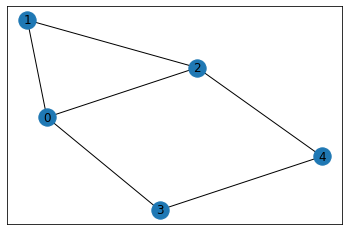

In [2]:
import networkx as nx

G=nx.Graph()
G.add_nodes_from(["0", "1", "2", "3", "4"])
G.add_edges_from([("0", "1"), ("1", "2"), ("2", "0"), ("0", "3"), ("2", "4"), ("3", "4")])

print("Nodes of graph: {}".format(G.nodes()))
print("Edges of graph: {}".format(G.edges()))

nx.draw_networkx(G)

In [3]:
m = nx.to_numpy_matrix(G)
print(m)

[[0. 1. 1. 1. 0.]
 [1. 0. 1. 0. 0.]
 [1. 1. 0. 0. 1.]
 [1. 0. 0. 0. 1.]
 [0. 0. 1. 1. 0.]]


\begin{pmatrix} 
0 & 1 & 1 & 1 & 0 \\
1 & 0 & 1 & 0 & 0 \\
1 & 1 & 0 & 0 & 1 \\
1 & 0 & 0 & 0 & 1 \\
0 & 0 & 1 & 1 & 0 \\
\end{pmatrix}


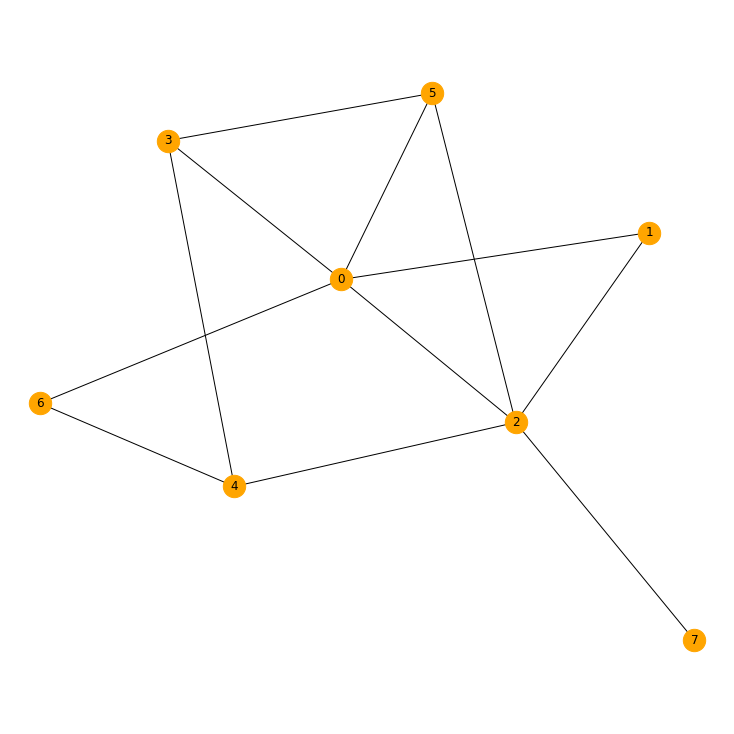

Nodes of graph: ['0', '1', '2', '3', '4', '5', '6', '7']
Edges of graph: [('0', '1'), ('0', '2'), ('0', '3'), ('0', '6'), ('0', '5'), ('1', '2'), ('2', '4'), ('2', '5'), ('2', '7'), ('3', '4'), ('3', '5'), ('4', '6')]
visiting 0
visiting neighbours of 0
stepping to edge (0, 1)
  visiting 1
  visiting neighbours of 1
  stepping to edge (1, 0)
    0 was already visited
  stepping to edge (1, 2)
    visiting 2
    visiting neighbours of 2
    stepping to edge (2, 0)
      0 was already visited
    stepping to edge (2, 1)
      1 was already visited
    stepping to edge (2, 4)
      visiting 4
      visiting neighbours of 4
      stepping to edge (4, 2)
        2 was already visited
      stepping to edge (4, 3)
        visiting 3
        visiting neighbours of 3
        stepping to edge (3, 0)
          0 was already visited
        stepping to edge (3, 4)
          4 was already visited
        stepping to edge (3, 5)
          visiting 5
          visiting neighbours of 5
          step

In [4]:
import networkx as nx
import numpy as np

from networkx.drawing.nx_pydot import graphviz_layout
import matplotlib.pyplot as plt

def depth_first_search(v, m, visited_vertices, depth):
    padding = "  "
    if v not in visited_vertices:
        print("{}visiting {}".format(padding*depth, v))
        visited_vertices.append(v)
        num_of_vertices = np.shape(m)[0]
        print("{}visiting neighbours of {}".format(padding*depth, v))
        for j in range(0, num_of_vertices):
            if m[v,j] != 0:
                print("{}stepping to edge ({}, {})".format(padding*depth, v, j))
                depth_first_search(j, m, visited_vertices, depth + 1)
    else:
        print("{}{} was already visited".format(padding*depth, v))


G=nx.Graph()
G.add_nodes_from(["0", "1", "2", "3", "4", "5", "6", "7"])
G.add_edges_from([("0", "1"), 
                  ("1", "2"), 
                  ("2", "0"), 
                  ("0", "3"), 
                  ("2", "4"), 
                  ("3", "4"), 
                  ("0", "6"), 
                  ("4", "6"), 
                  ("2", "5"), 
                  ("3", "5"), 
                  ("0", "5"), 
                  ("2", "7")])

pos = graphviz_layout(G, prog='neato')
plt.figure(figsize=(10, 10))
nx.draw(G, pos, node_size=500, alpha=1, node_color="orange", with_labels=True)
plt.axis('equal')
plt.show()

print("Nodes of graph: {}".format(G.nodes()))
print("Edges of graph: {}".format(G.edges()))
visited_vertices = []
depth_first_search(0, nx.to_numpy_matrix(G), visited_vertices, 0)
print("Vertices were visited in the following sequence: {}".format(visited_vertices))

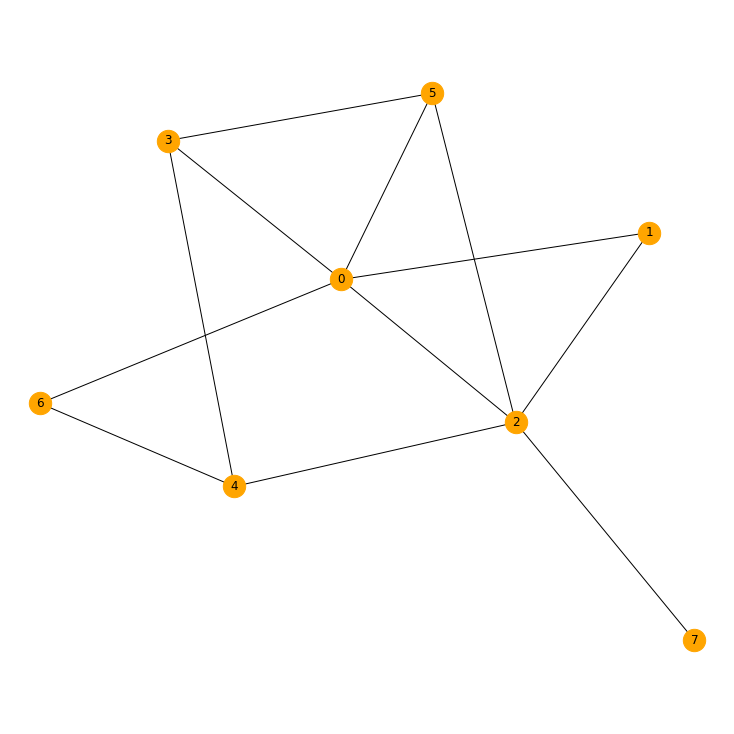

Nodes of graph: ['0', '1', '2', '3', '4', '5', '6', '7']
Edges of graph: [('0', '1'), ('0', '2'), ('0', '3'), ('0', '6'), ('0', '5'), ('1', '2'), ('2', '4'), ('2', '5'), ('2', '7'), ('3', '4'), ('3', '5'), ('4', '6')]
visiting 0
visiting 1
visiting 2
visiting 3
visiting 5
visiting 6
2 was already visited
visiting 4
5 was already visited
visiting 7
4 was already visited
5 was already visited
4 was already visited
Vertices were visited in the following sequence: [0, 1, 2, 3, 5, 6, 4, 7]


In [5]:
import networkx as nx
import numpy as np
from networkx.drawing.nx_pydot import graphviz_layout
import matplotlib.pyplot as plt

def mark_as_visited(v, m, visited_vertices, to_be_visited_vertices):
    if v not in visited_vertices:
        print("visiting {}".format(v))
        visited_vertices.append(v)
        num_of_vertices = np.shape(m)[0]
        for j in range(0, num_of_vertices):
            if m[v,j] != 0 and j not in visited_vertices:
                to_be_visited_vertices.append(j)
    else:
        print("{} was already visited".format(v))

def breadth_first_search(v, m, visited_vertices):
    to_be_visited_vertices = []
    mark_as_visited(v, m, visited_vertices, to_be_visited_vertices)
    while len(to_be_visited_vertices) != 0:
        j = to_be_visited_vertices.pop(0)
        mark_as_visited(j, m, visited_vertices, to_be_visited_vertices)


G=nx.Graph()
G.add_nodes_from(["0", "1", "2", "3", "4", "5", "6", "7"])
G.add_edges_from([("0", "1"), 
                  ("1", "2"), 
                  ("2", "0"), 
                  ("0", "3"), 
                  ("2", "4"), 
                  ("3", "4"), 
                  ("0", "6"), 
                  ("4", "6"), 
                  ("2", "5"), 
                  ("3", "5"), 
                  ("0", "5"), 
                  ("2", "7")])

pos = graphviz_layout(G, prog='neato')
plt.figure(figsize=(10, 10))
nx.draw(G, pos, node_size=500, alpha=1, node_color="orange", with_labels=True)
plt.axis('equal')
plt.show()

print("Nodes of graph: {}".format(G.nodes()))
print("Edges of graph: {}".format(G.edges()))
visited_vertices = []
breadth_first_search(0, nx.to_numpy_matrix(G), visited_vertices)
print("Vertices were visited in the following sequence: {}".format(visited_vertices))

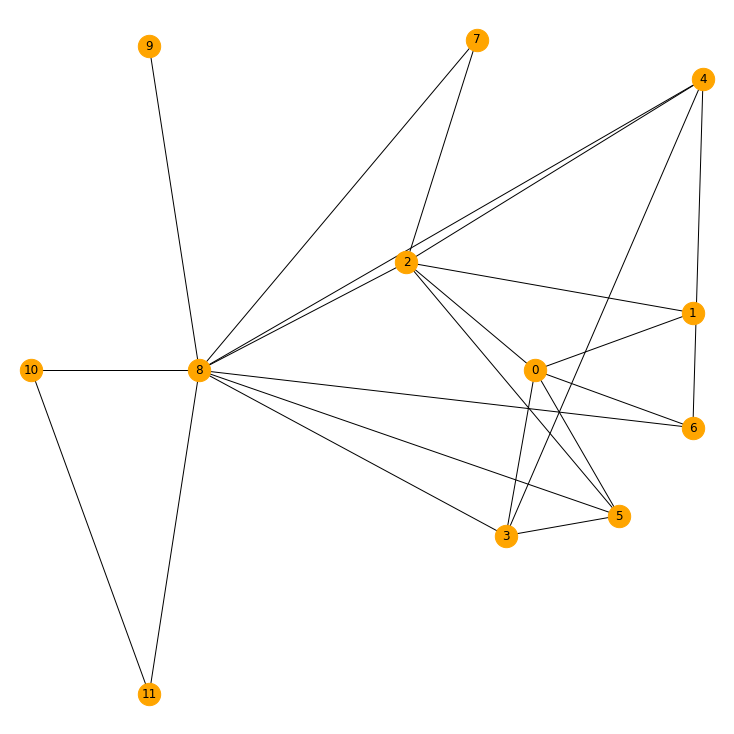

Nodes of graph: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']
Edges of graph: [('0', '1'), ('0', '2'), ('0', '3'), ('0', '6'), ('0', '5'), ('1', '2'), ('2', '4'), ('2', '5'), ('2', '7'), ('2', '8'), ('3', '4'), ('3', '5'), ('3', '8'), ('4', '6'), ('4', '8'), ('5', '8'), ('6', '8'), ('7', '8'), ('8', '9'), ('8', '10'), ('8', '11'), ('10', '11')]
visiting 0
visiting 1
visiting 2
visiting 3
visiting 5
visiting 6
2 was already visited
visiting 4
5 was already visited
visiting 7
visiting 8
4 was already visited
5 was already visited
8 was already visited
8 was already visited
4 was already visited
8 was already visited
8 was already visited
8 was already visited
visiting 9
visiting 10
visiting 11
11 was already visited
Vertices were visited in the following sequence: [0, 1, 2, 3, 5, 6, 4, 7, 8, 9, 10, 11]


In [6]:
import networkx as nx
import numpy as np
from networkx.drawing.nx_pydot import graphviz_layout
import matplotlib.pyplot as plt

def mark_as_visited(v, m, visited_vertices, to_be_visited_vertices):
    if v not in visited_vertices:
        print("visiting {}".format(v))
        visited_vertices.append(v)
        num_of_vertices = np.shape(m)[0]
        for j in range(0, num_of_vertices):
            if m[v,j] != 0 and j not in visited_vertices:
                to_be_visited_vertices.append(j)
    else:
        print("{} was already visited".format(v))

def breadth_first_search(v, m, visited_vertices):
    to_be_visited_vertices = []
    mark_as_visited(v, m, visited_vertices, to_be_visited_vertices)
    while len(to_be_visited_vertices) != 0:
        j = to_be_visited_vertices.pop(0)
        mark_as_visited(j, m, visited_vertices, to_be_visited_vertices)


G=nx.Graph()
G.add_nodes_from(["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11"])
G.add_edges_from([("0", "1"), 
                  ("1", "2"), 
                  ("2", "0"), 
                  ("0", "3"), 
                  ("2", "4"), 
                  ("3", "4"), 
                  ("0", "6"), 
                  ("4", "6"), 
                  ("2", "5"), 
                  ("3", "5"), 
                  ("0", "5"), 
                  ("2", "7"),
                  ("7", "8"),
                  ("8", "2"),
                  ("8", "3"),
                  ("8", "4"),
                  ("8", "5"),
                  ("8", "6"),
                  ("8", "9"),
                  ("8", "10"),
                  ("8", "11"),
                  ("10", "11")])

pos = graphviz_layout(G, prog='twopi')
plt.figure(figsize=(10, 10))
nx.draw(G, pos, node_size=500, alpha=1, node_color="orange", with_labels=True)
plt.axis('equal')
plt.show()

print("Nodes of graph: {}".format(G.nodes()))
print("Edges of graph: {}".format(G.edges()))
visited_vertices = []
breadth_first_search(0, nx.to_numpy_matrix(G), visited_vertices)
print("Vertices were visited in the following sequence: {}".format(visited_vertices))

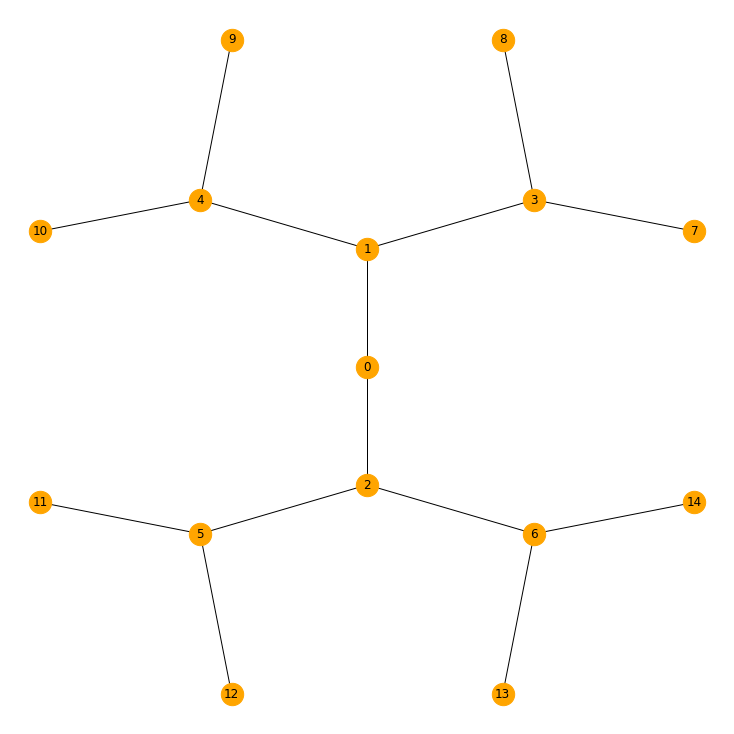

Nodes of graph: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
Edges of graph: [(0, 1), (0, 2), (1, 3), (1, 4), (2, 5), (2, 6), (3, 7), (3, 8), (4, 9), (4, 10), (5, 11), (5, 12), (6, 13), (6, 14)]
visiting 0
visiting 1
visiting 2
visiting 3
visiting 4
visiting 5
visiting 6
visiting 7
visiting 8
visiting 9
visiting 10
visiting 11
visiting 12
visiting 13
visiting 14
Vertices were visited in the following sequence: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


In [7]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
import numpy as np

def mark_as_visited(v, m, visited_vertices, to_be_visited_vertices):
    print("visiting {}".format(v))
    visited_vertices.append(v)
    num_of_vertices = np.shape(m)[0]
    for j in range(0, num_of_vertices):
        if m[v,j] != 0 and j not in visited_vertices:
            to_be_visited_vertices.append(j)

def breadth_first_search(v, m, visited_vertices):
    to_be_visited_vertices = []
    mark_as_visited(v, m, visited_vertices, to_be_visited_vertices)
    while len(to_be_visited_vertices) != 0:
        j = to_be_visited_vertices.pop(0)
        mark_as_visited(j, m, visited_vertices, to_be_visited_vertices)

G = nx.balanced_tree(2, 3)
pos = graphviz_layout(G, prog='twopi')
plt.figure(figsize=(10, 10))
nx.draw(G, pos, node_size=500, alpha=1, node_color="orange", with_labels=True)
plt.axis('equal')
plt.show()

print("Nodes of graph: {}".format(G.nodes()))
print("Edges of graph: {}".format(G.edges()))
visited_vertices = []
breadth_first_search(0, nx.to_numpy_matrix(G), visited_vertices)
print("Vertices were visited in the following sequence: {}".format(visited_vertices))

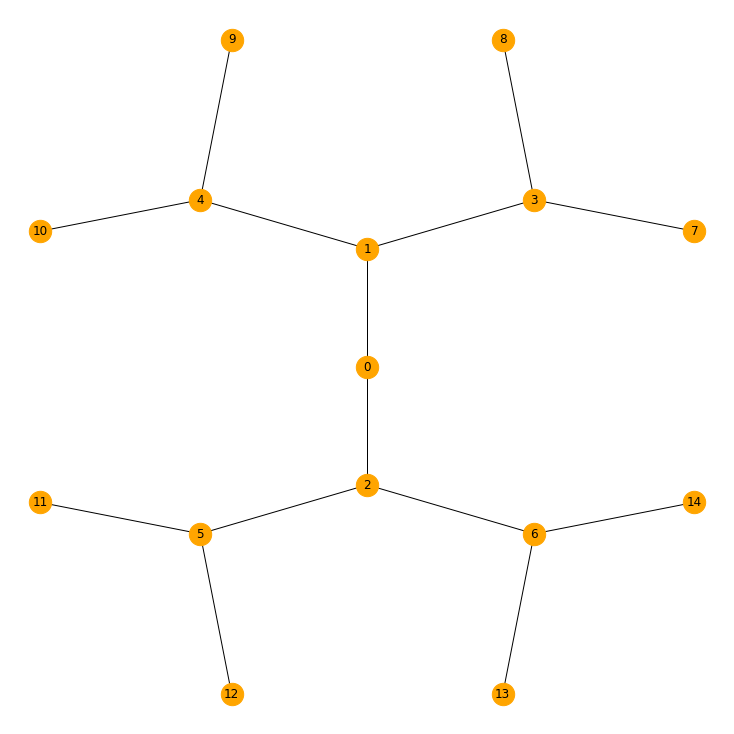

Nodes of graph: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
Edges of graph: [(0, 1), (0, 2), (1, 3), (1, 4), (2, 5), (2, 6), (3, 7), (3, 8), (4, 9), (4, 10), (5, 11), (5, 12), (6, 13), (6, 14)]
visiting 0
visiting 1
visiting 2
visiting 3
visiting 4
visiting 5
visiting 6
visiting 7
visiting 8
visiting 9
visiting 10
visiting 11
visiting 12
visiting 13
visiting 14
Vertices were visited in the following sequence: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


In [8]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
import numpy as np

def mark_as_visited(v, m, visited_vertices, to_be_visited_vertices):
    print("visiting {}".format(v))
    visited_vertices.append(v)
    num_of_vertices = np.shape(m)[0]
    for j in range(0, num_of_vertices):
        if m[v,j] != 0 and j not in visited_vertices:
            to_be_visited_vertices.append(j)

def breadth_first_search(v, m, visited_vertices):
    to_be_visited_vertices = []
    mark_as_visited(v, m, visited_vertices, to_be_visited_vertices)
    while len(to_be_visited_vertices) != 0:
        j = to_be_visited_vertices.pop(0)
        mark_as_visited(j, m, visited_vertices, to_be_visited_vertices)

G = nx.balanced_tree(2, 3)
pos = graphviz_layout(G, prog='twopi')
plt.figure(figsize=(10, 10))
nx.draw(G, pos, node_size=500, alpha=1, node_color="orange", with_labels=True)
plt.axis('equal')
plt.show()

print("Nodes of graph: {}".format(G.nodes()))
print("Edges of graph: {}".format(G.edges()))
visited_vertices = []
breadth_first_search(0, nx.to_numpy_matrix(G), visited_vertices)
print("Vertices were visited in the following sequence: {}".format(visited_vertices))

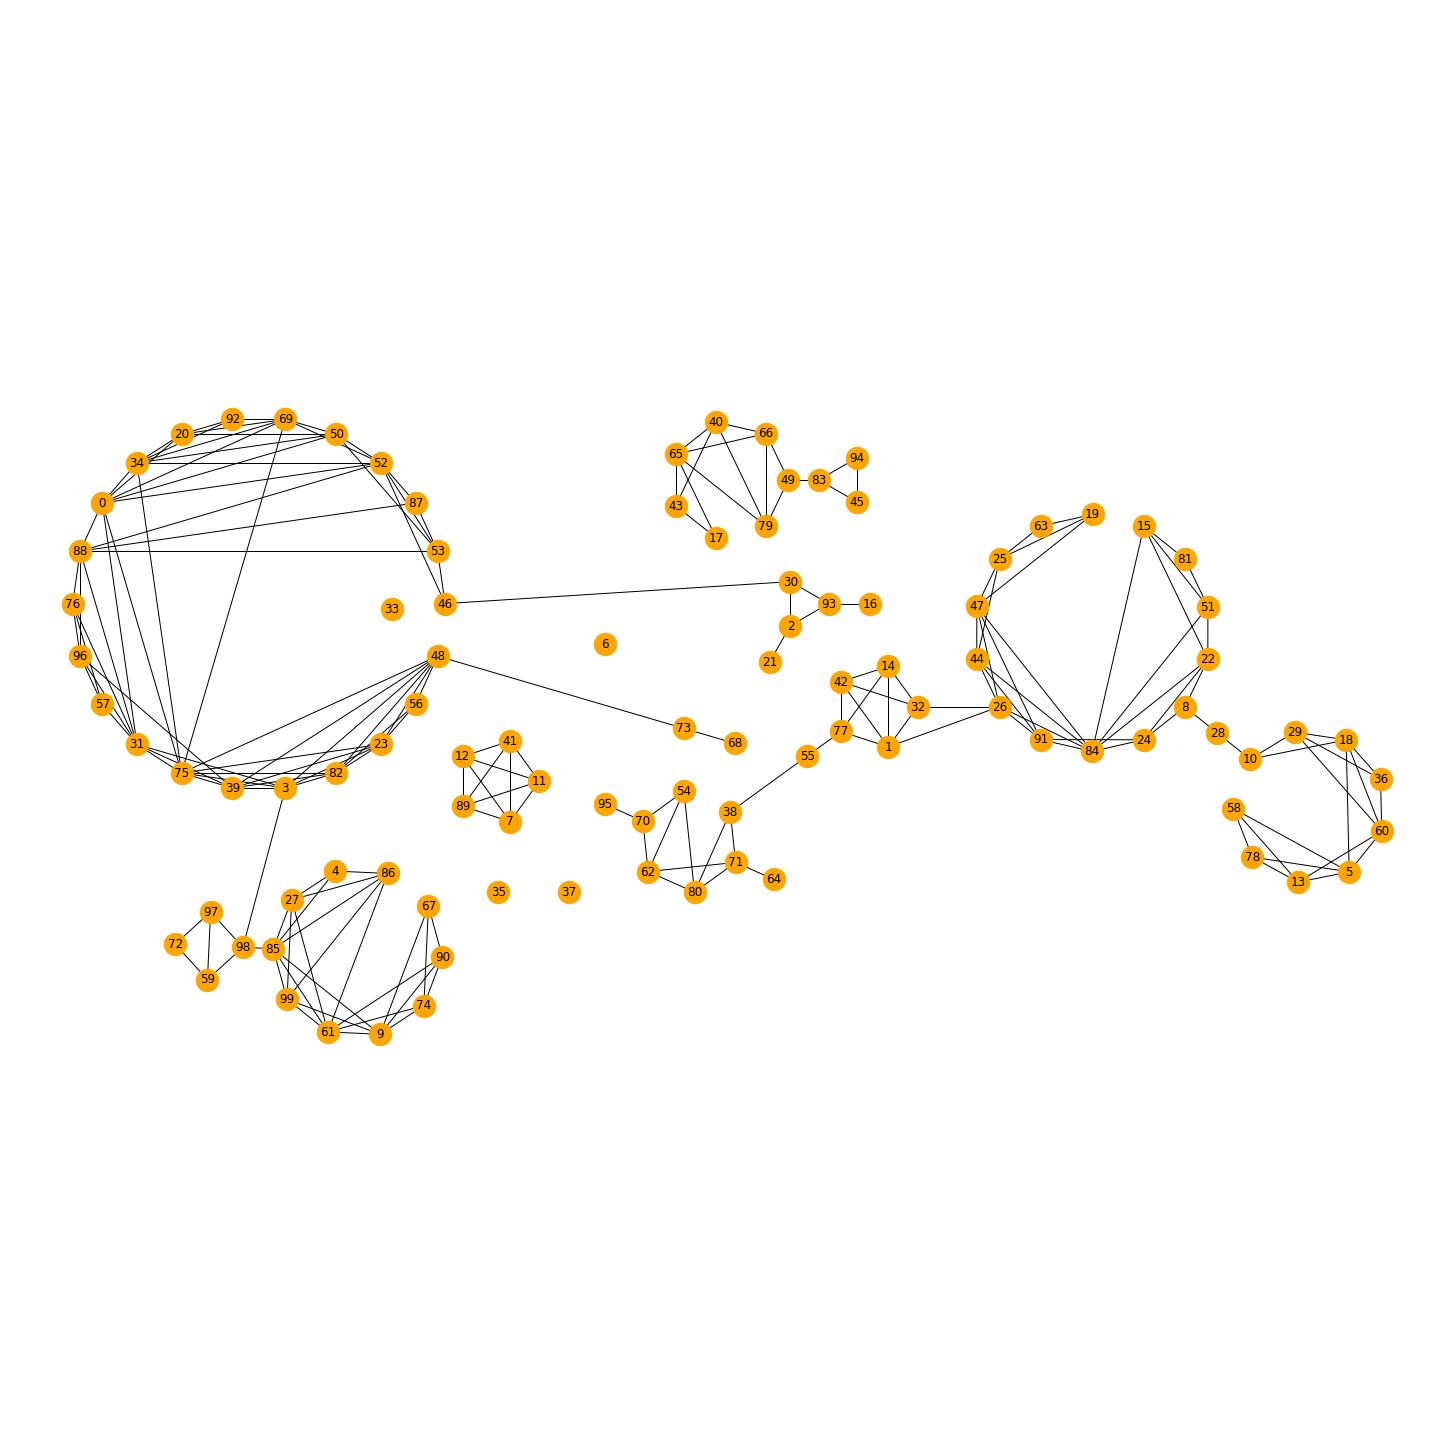

In [9]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.random_geometric_graph(100, 0.125)
pos = graphviz_layout(G, prog='circo')
plt.figure(figsize=(20, 20))
nx.draw(G, pos, node_size=500, alpha=1, node_color="orange", with_labels=True)
plt.axis('equal')
plt.show()